# Vacunacions

In [100]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import seaborn as sns

from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

In [105]:
url = "https://dadescovid.cat/static/csv/catalunya_diari_total_pob.zip"
    
resp = urlopen(url)
zipfile = ZipFile(BytesIO(resp.read()))
df = pd.read_csv(zipfile.open(zipfile.namelist()[0]), sep=";")
df["DATA"] = df.DATA.astype('datetime64[ns]')
df = df[df.DATA>datetime(2021, 1, 1)]

In [106]:
df.head()

,NOM,CODI,DATA,SEXE,GRUP_EDAT,CASOS_CONFIRMAT,PCR,TAR,INGRESSOS_TOTAL,INGRESSOS_CRITIC,...,INGRESSATS_CRITIC,EXITUS,CASOS_PCR,CASOS_TAR,POSITIVITAT_PCR_NUM,POSITIVITAT_TAR_NUM,POSITIVITAT_PCR_DEN,POSITIVITAT_TAR_DEN,VACUNATS_DOSI_1,VACUNATS_DOSI_2
0,CATALUNYA,GLOBAL,2021-04-26,Altres,NaN,17,5,3,0,16,...,18,0,2,15,0,1,4,3,76,16
1,CATALUNYA,GLOBAL,2021-04-26,Dona,Entre 15 i 64,315,854,2235,2,1,...,50,0,25,290,31,231,747,2114,3210,759
2,CATALUNYA,GLOBAL,2021-04-26,Dona,Entre 65 i 74,28,127,255,1,4,...,55,0,3,25,3,22,112,239,8757,206
3,CATALUNYA,GLOBAL,2021-04-26,Dona,Majors de 74,24,321,165,0,1,...,23,0,6,18,8,17,288,158,353,137
4,CATALUNYA,GLOBAL,2021-04-26,Dona,Menors de 15,26,125,662,0,0,...,1,0,5,21,4,19,116,629,0,0


## Daily

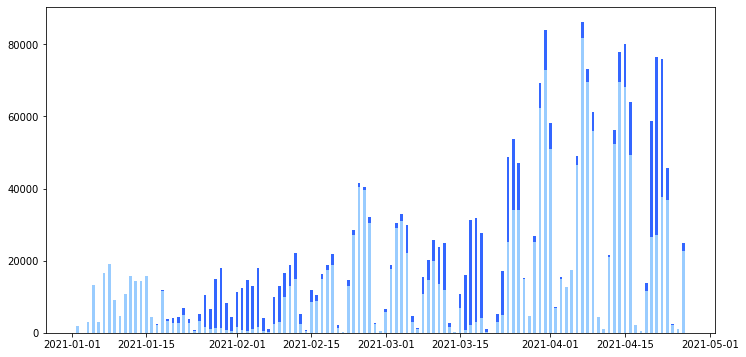

In [115]:
vac_cols = ["VACUNATS_DOSI_1", "VACUNATS_DOSI_2"]
vd = df.groupby("DATA", as_index=False)[vac_cols].sum()
fig, ax = plt.subplots(figsize=(12,6))
p1 = ax.bar(vd.DATA, vd.VACUNATS_DOSI_1, width=0.5, color = [(0.6, 0.8, 1)])
p2 = ax.bar(vd.DATA, vd.VACUNATS_DOSI_2, width=0.5, bottom=vd.VACUNATS_DOSI_1, color=[(0.2, 0.4, 1)])

## Weekly

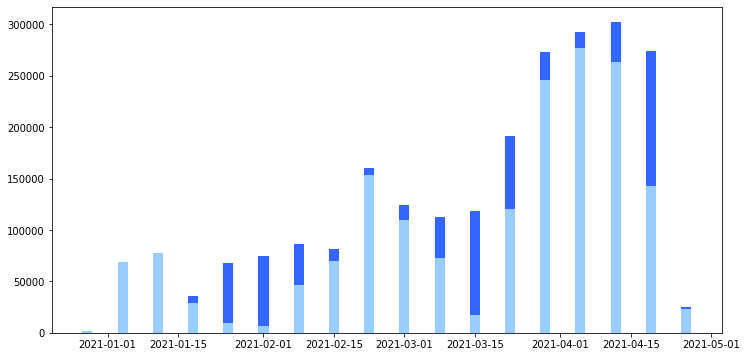

In [116]:
vac_cols = ["VACUNATS_DOSI_1", "VACUNATS_DOSI_2"]
df["firstDayWeek"] = df.DATA - df.DATA.dt.weekday * timedelta(days=1)
vd = df.groupby("firstDayWeek", as_index=False)[vac_cols].sum()
fig, ax = plt.subplots(figsize=(12,6))
p1 = ax.bar(vd.firstDayWeek, vd.VACUNATS_DOSI_1, width=2, color = [(0.6, 0.8, 1)])
p2 = ax.bar(vd.firstDayWeek, vd.VACUNATS_DOSI_2, width=2, bottom=vd.VACUNATS_DOSI_1, color = [(0.2, 0.4, 1)])

## Cumulative